In [342]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats
import activity_classifier.sigproc as sigproc
plt.style.use('ggplot')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def _plot(x, t=None, ax=None, show_plot=True, **kwargs):
    if ax is None:
        _, ax = plt.subplots()
    fig = ax.get_figure()
    if t is None:
        ax.plot(x, **kwargs)
    else:
        ax.plot(t, x, **kwargs)
    if show_plot:
        fig.set_figheight(2.5)
        fig.set_figwidth(10)
        plt.show()
    return fig, ax

29
-0.2917466868686854 -0.1
(1000,) (1000,) (980,) (980,) (979,)


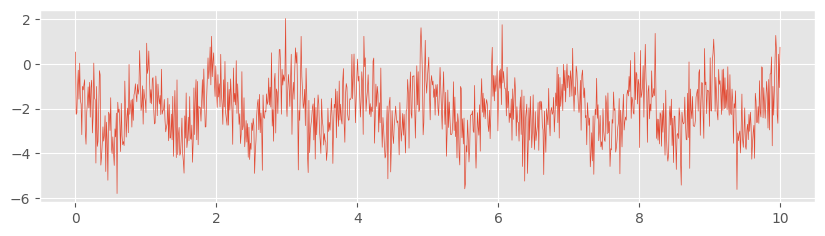

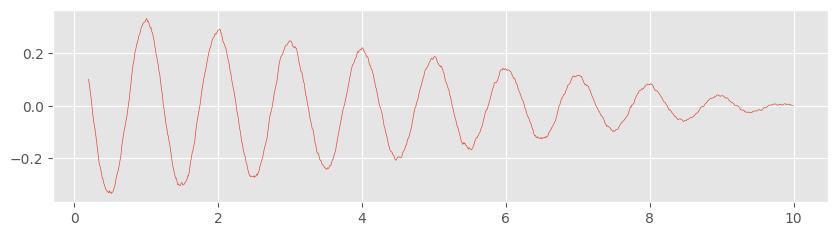

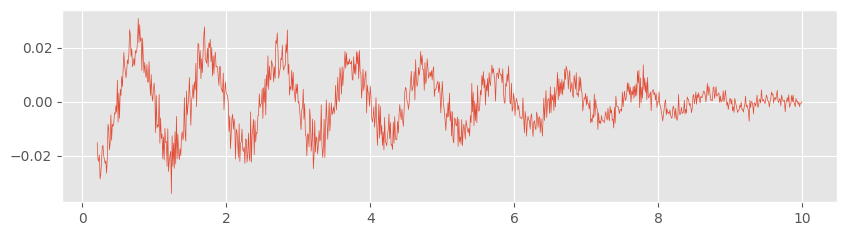

-0.32411734357758326 0.49


In [ ]:
N = 1000
a = 1.
f = 1.
fs = 100.
phase = np.pi / 2
offset = -2
noise_level = 1.
t, x = sigproc.generate_sinusoid(N, a, f, fs, phase, offset, noise_level=noise_level)

lpf = sigproc.SmartIIRFilter(signal.butter, 'lowpass', 4, 10, fs)
#x = lpf.apply(x-x.mean())
cor, lags, max_cor, max_lag = sigproc.scalar_autocorrelation(x, fs=fs, skip_lags=20, boxcar_width=5)
print(max_corr, lag)


dc1 = np.diff(cor)
fig, ax = _plot(x, t, show_plot=True, linewidth=0.5)
fig, ax = _plot(cor, lags, show_plot=True, linewidth=0.5)
fig, ax = _plot(dc1, lags[1:], show_plot=True, linewidth=0.5)

print(max_cor, max_lag)


1.5707963267948966

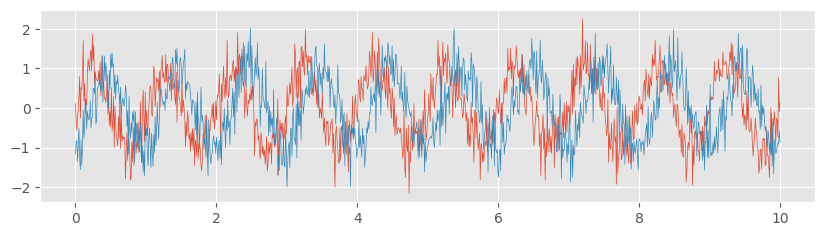

0.7628295624941164 -0.22


In [ ]:
# Scalar cross-correlation

N = 1000
f = 1
fs = 100.
offset = 0.
noise_level = 0.4
phase_deg = 280

t, x = sigproc.generate_sinusoid(N, a=1., f=f, fs=fs, phase=0, offset=offset, noise_level=noise_level)
t, y = sigproc.generate_sinusoid(N, a=1., f=f, fs=fs, phase=phase_deg * np.pi/180, offset=offset, noise_level=noise_level)

fig, ax = _plot(x, t, show_plot=False, linewidth=0.5)
fig, ax = _plot(y, t, show_plot=True, ax=ax,linewidth=0.5)

ncc, lag_time = sigproc.scalar_lagged_cross_correlation(x, y, fs, boxcar_width=5)
print(ncc, lag_time)

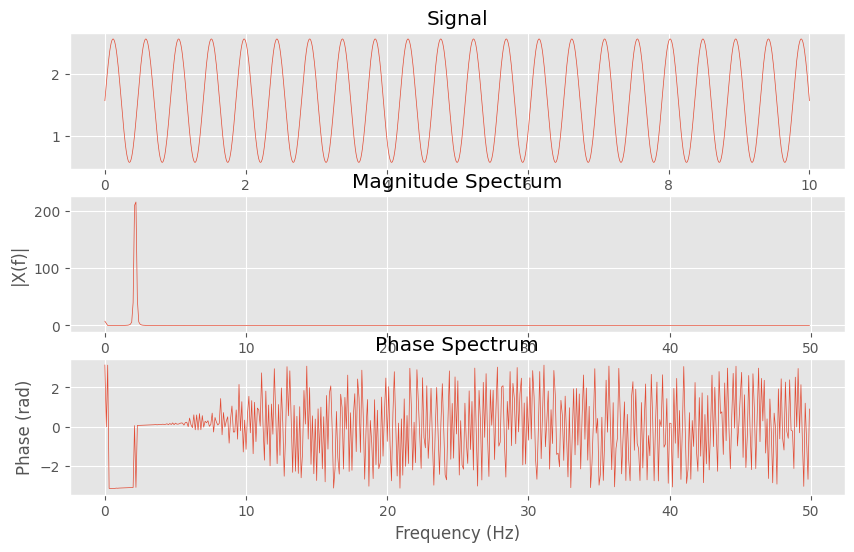

1e-05
2.2 -3.072477878246148
0.1400651667565222
0.18207375270172854 

-21.332412972173152
0.017527911507551


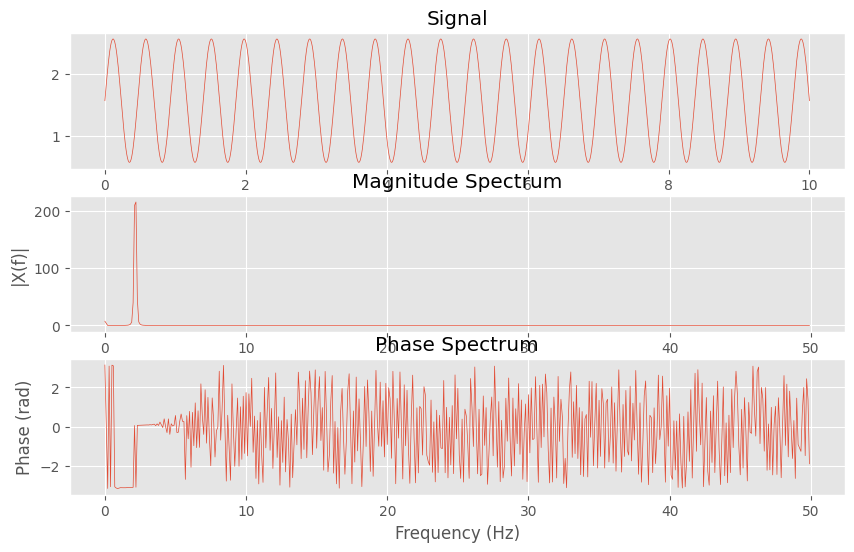

0.0001
2.2 -3.0724789090303144
0.1400655532129219
0.18207384846406 

-17.40622001523992
0.017527911507551


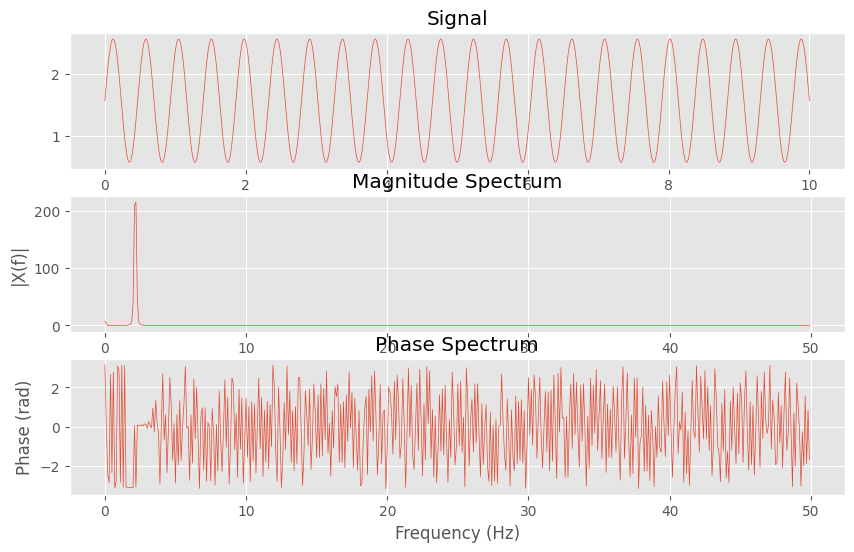

0.001
2.2 -3.0725311826460953
0.14006110835349567
0.18207421987767575 

-13.236422276703841
0.017527911507551


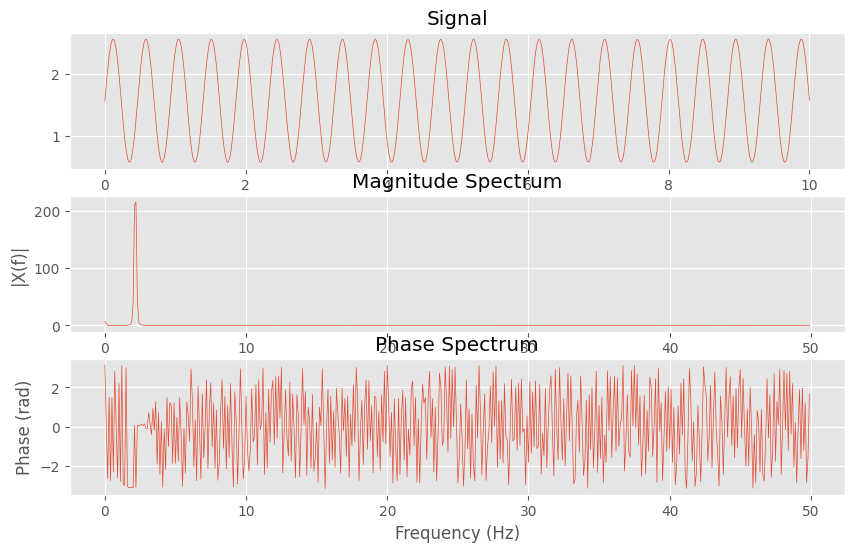

0.003
2.2 -3.072412360318155
0.14009164947439928
0.18213833176602212 

-11.259975116223059
0.017527911507551


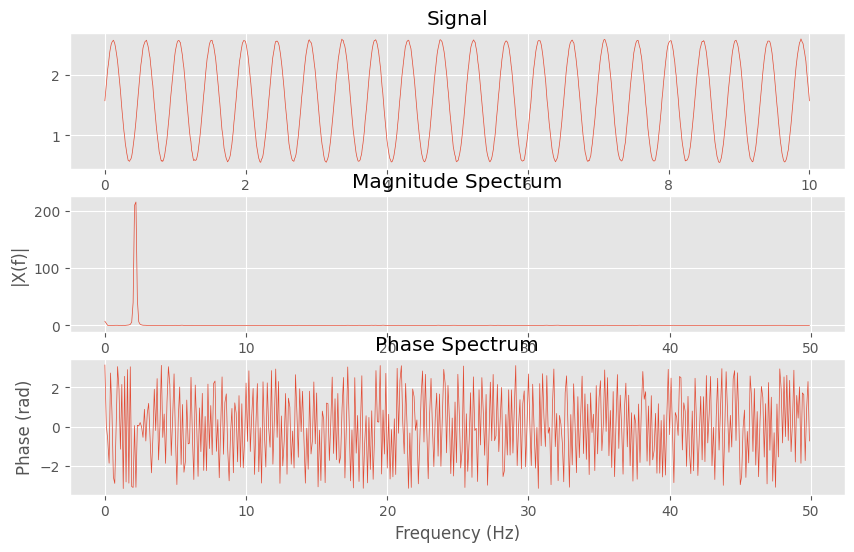

0.01
2.2 -3.071100985243327
0.14055992955156735
0.18264118276660568 

-8.834084597851609
0.021907025159394234


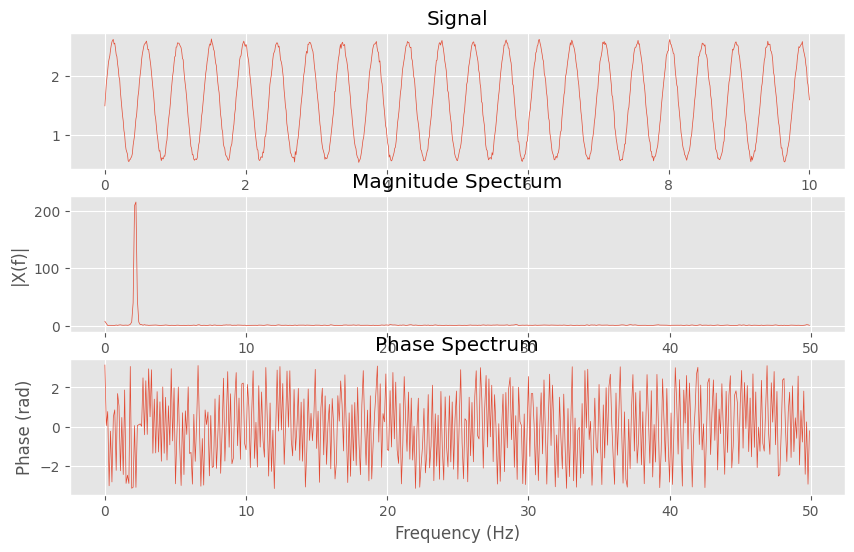

0.03
2.2 -3.0715689563336412
0.14357176515476125
0.18572562453914992 

-6.7932498030056925
0.022116778105484947


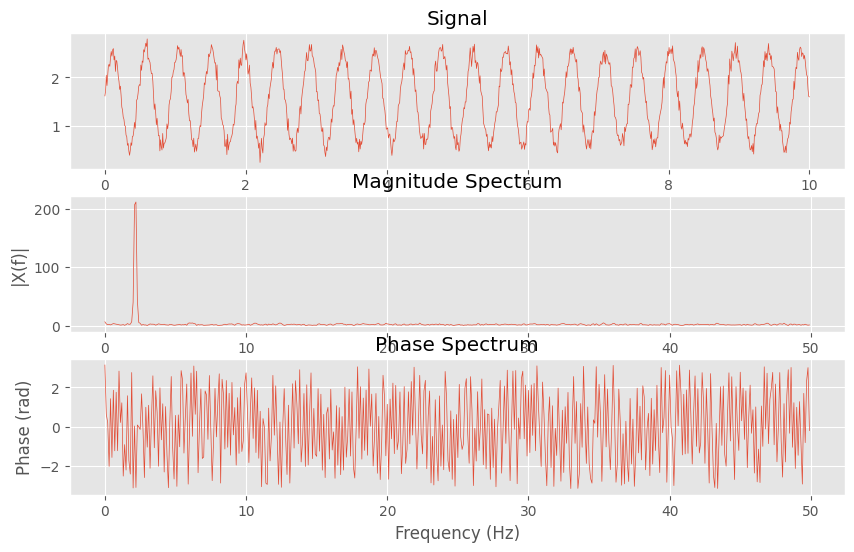

0.1
2.2 -3.0838279292371995
0.17100161677274864
0.21578816796957845 

-4.394098633629553
0.3666281456092235


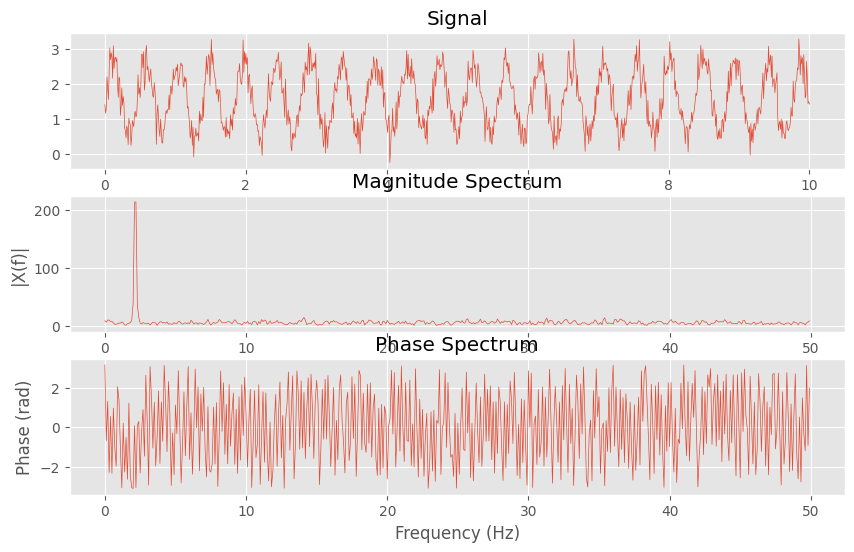

0.3
2.1 0.06827394423484222
0.312636596217882
0.37317880752151955 

-2.4360919049605294
1.083472515313791


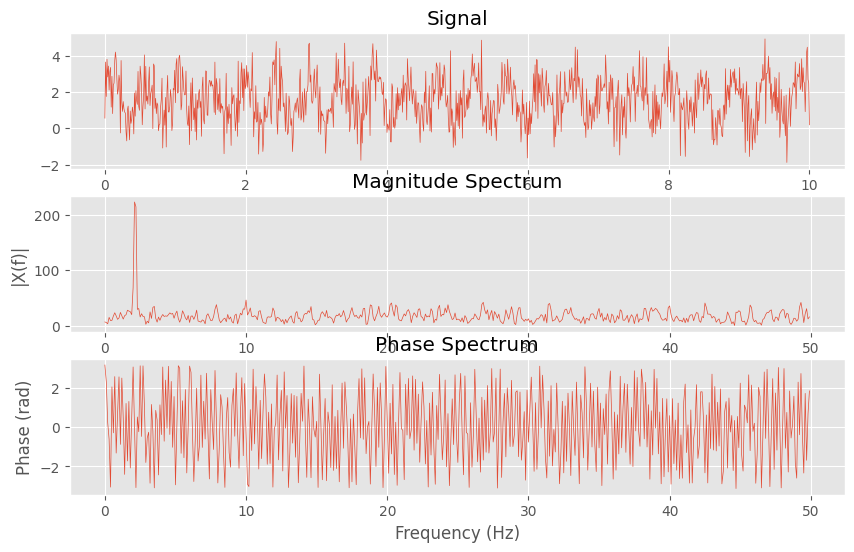

1
2.1 0.021945230787263174
0.7498532849870115
0.8352063730067171 

-1.0041872556021736
1.0730597481330482


In [336]:
N = 1000
a = 1.
f = 2.15
fs = 100.
sig_phase = 0.
offset = np.pi / 2
#noise_level = 0.1

for noise_level in [0.00001, 0.0001, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]:

#for noise_level in [0.1]:
    t, x = sigproc.generate_sinusoid(N, a, f, fs, sig_phase, offset, noise_level=noise_level)
    mag, phase, freqs = sigproc.mag_phase_spectrum(x, fs, window_func=np.hanning)

    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3 ,figsize=(10,6))  
    _plot(x, t, ax=ax1, show_plot=False, linewidth=0.5)
    ax1.set_title("Signal")    
    _plot(mag, freqs, ax=ax2, show_plot=False, linewidth=0.5)
    ax2.set_title("Magnitude Spectrum")
    ax2.set_xlabel("Frequency (Hz)")
    ax2.set_ylabel("|X(f)|")
    _plot(phase, freqs, ax=ax3, show_plot=False, linewidth=0.5)
    ax3.set_title("Phase Spectrum")
    ax3.set_xlabel("Frequency (Hz)")
    ax3.set_ylabel("Phase (rad)")
    plt.show()
    
    
    freq, phase = sigproc.dominant_frequency(freqs, mag, phase)
    print(noise_level)
    print(freq, phase)
    fw, Pxx = signal.welch(x, fs)
    print(sigproc.spectral_entropy(mag))
    print(sigproc.spectral_entropy(np.sqrt(Pxx)), '\n')
    print(np.log(sigproc.spectral_flatness(mag)))
    print(sigproc.coefficient_of_variation_of_zero_crossing(x))